# **1/ Introduction:**

Bộ dữ liệu về chiến dịch tele-marketing ở Thổ Nhĩ Kỳ (từ 05/2008 đến 11/2010) trên 41188 mẫu: 
https://www.kaggle.com/henriqueyamahata/bank-marketing

**#Input variables:**

1. Bank client data:
- age (numeric)
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")

2. Related with the last contact of the current campaign:
- contact: contact communication type (categorical: "cellular","telephone")
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**#Other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

3. Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

**#Output variable (desired target):**
y - has the client subscribed a term deposit? (binary: "yes","no")

**#Import Data:**

In [9]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **2/ Data Observation:**

In [26]:
path = '../input/bank-marketing/bank-additional-full.csv'
bank_mkt_df  = pd.read_csv(path, sep=';')
bank_mkt_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
bank_mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
print(bank_mkt_df.y.value_counts())

dfgrouped = df.groupby('y')

no     36548
yes     4640
Name: y, dtype: int64


In [29]:
categorical = bank_mkt_df.dtypes[df.dtypes == 'object'].index.tolist()
numerical = bank_mkt_df.dtypes[df.dtypes != 'object'].index.tolist()
print('numerical: '+str(len(numerical))+': '+str(numerical))
print('categorical: '+str(len(categorical))+': '+ str(categorical))

numerical: 10: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical: 11: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [30]:
for type,data in dfgrouped:
  display(type)
  display(data)

'no'

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


'yes'

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **3/ Exploratory Data Analysis:**

- Xét các biến numeric:

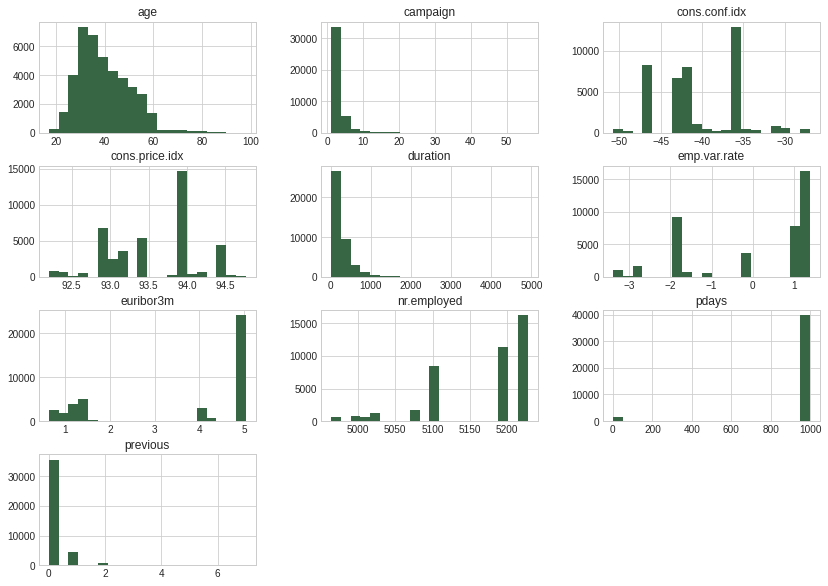

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#366644')
plt.show()

- Xét các biến categorical

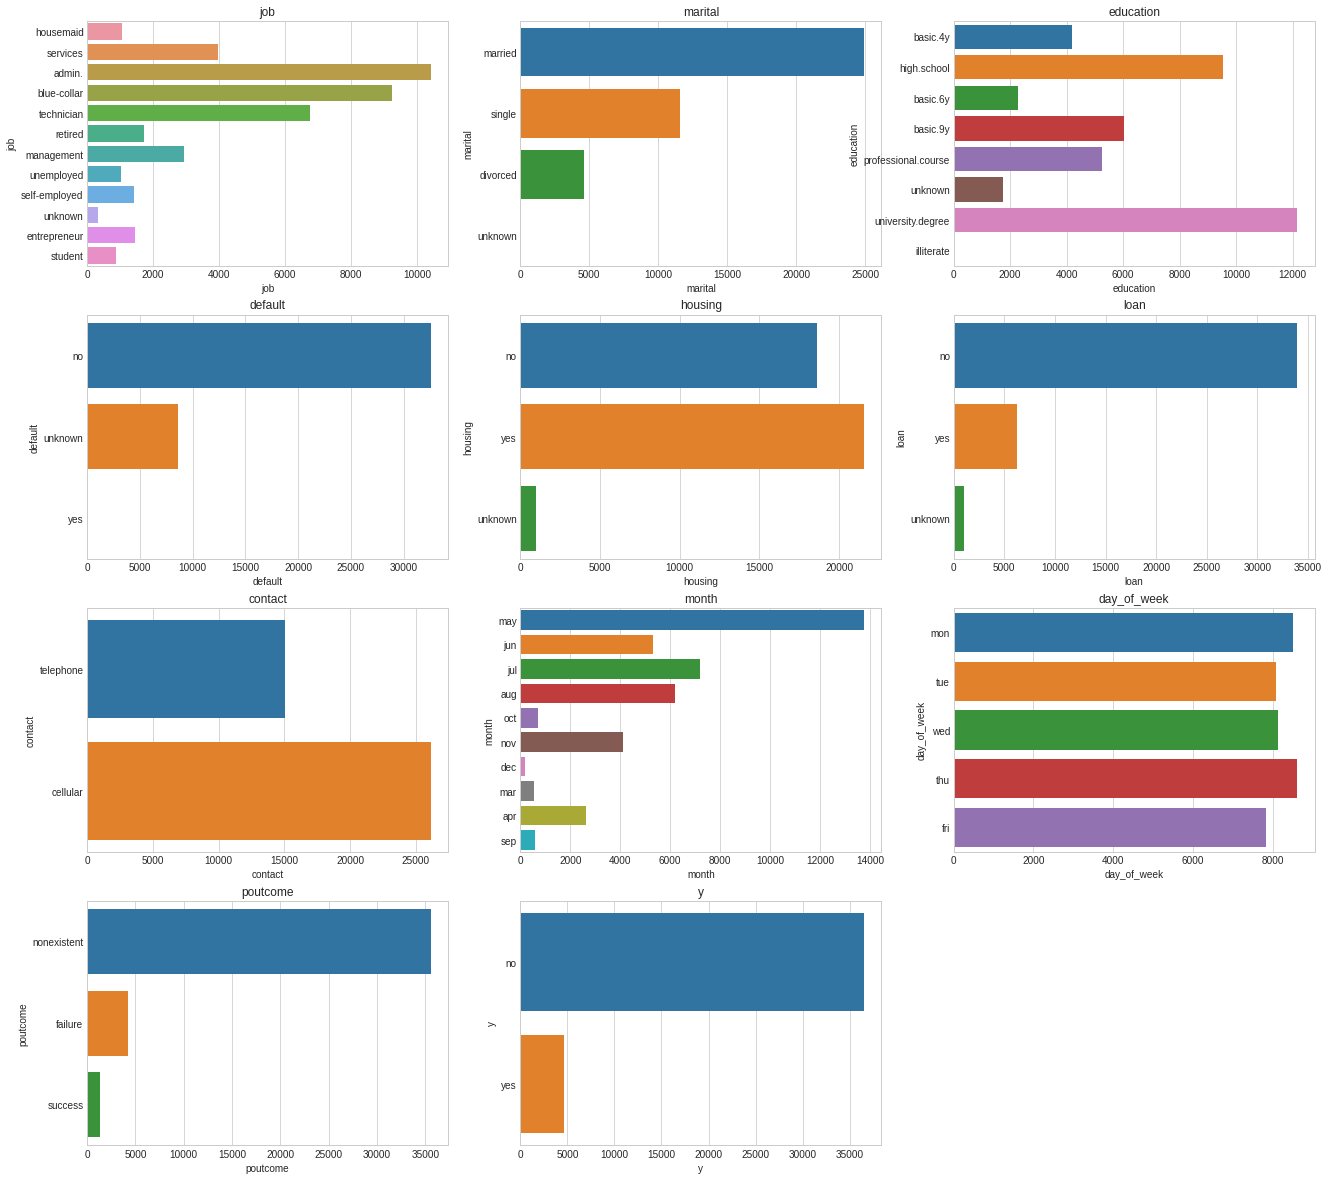

In [33]:
plt.figure(figsize=(22,80), facecolor='white')
plotnumber =1
for i in categorical:
    ax = plt.subplot(15,3,plotnumber)
    sns.countplot(y=i, data=bank_mkt_df)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

#Tổng quá về data:

- Đa số mọi người nằm ở nhóm tuổi từ 25-60, phân khúc tập trung là 28-40.
- Phần lớn là lần đầu thực hiện cuộc gọi hoặc < 2 lần (khách hàng mới) và không có tương tác/liên lạc gần đây.
- Top 5 nghề nghiệp phổ biến nhất trong bộ data là admin, blue-collar, technician, services & management.
- Đa số đã kết hôn (>60%), còn lại là độc thân (30%), một số ít đã ly hôn (10%).
- Hầu hết là không có nợ xấu nhưng đều đang trả góp mua nhà, một số ít có những khoản vay nhỏ.
- Phương thức tiếp cận chủ yếu: điện thoại di động.
- Liên lạc chủ yếu rơi vào mùa hè, đặc biệt là tháng 5. Không có sự khác biệt nhiều giữa các ngày trong tuần. 

#Mối tương quan giữa các biến numeric & categorical:

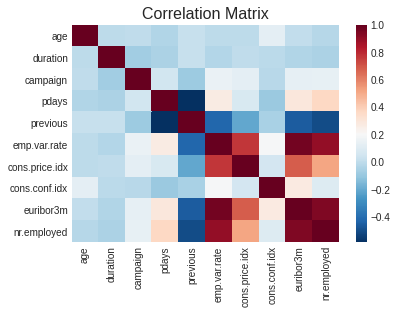

In [50]:
def show_correlation_matrix(df, vmin_val = -1, vmax_val = 1):
    f, ax = plt.subplots(figsize=(16, 10))
corr_numeric = numeric_df.corr()
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

- Từ ma trận tương quan giữa các hệ số, có thể thấy mối quan hệ giữa các biến về yếu tố xã hội và biến y là mối quan hệ nghịch biến, khi các chỉ số này âm, thì tỉ lệ thành công sẽ tăng, có thể dựa vào các chỉ số này để giảm thiểu rủi ro hoặc tăng tỉ lệ thành công cho chiến dịch, cụ thể:
> Chỉ số cons.conf.idx: thể hiện độ tin tưởng và lạc quan của khách hàng đối với thị trường, chỉ số này dương tức là họ sẽ tiêu dùng mạnh, nhưng trong bộ data này, tỉ lệ chỉ số cons.conf.idx âm, tức họ không lạc quan với thị trường, vì vậy sẽ giảm tiêu dùng và có xu hướng tiết kiệm tiền gửi.

- Mối liên hệ giữa biến categorical và tỉ lệ thành công:

In [106]:
def feature_perc(feature, groupby= 'yes'):

  count = dfgrouped.get_group(groupby)[feature].value_counts()
  total_count = df[feature].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc 


def plot_barh(array,incrementer, bias,ax = None, text_color ='green', palette_style = 'whitegrid',palette_color = 'RdBu'):

  sns.set_style(palette_style)
  sns.set_palette(palette_color)
    
  sns.barplot(x= array, y= array.index, ax=ax)
  #plt.barh(array.index, width = array.values, height = .5)
  plt.yticks(np.arange(len(array)))
  plt.xticks( range(0, round(max(array)) +bias, incrementer ))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

  #plt.show()
  return plt

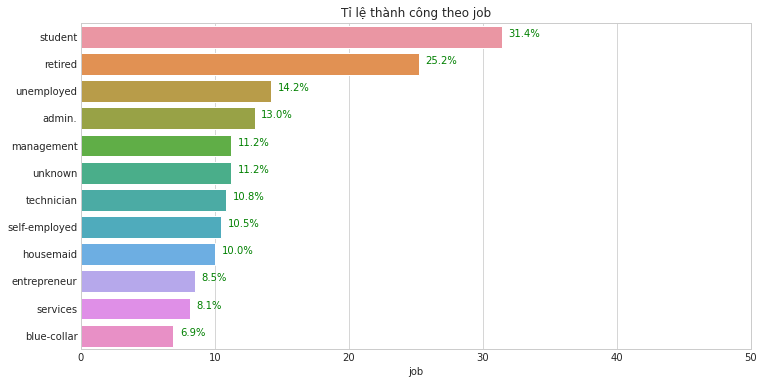

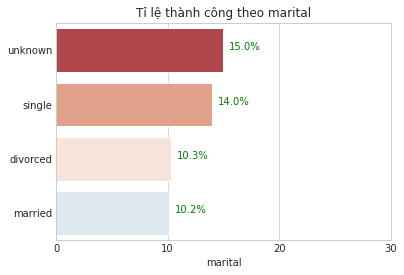

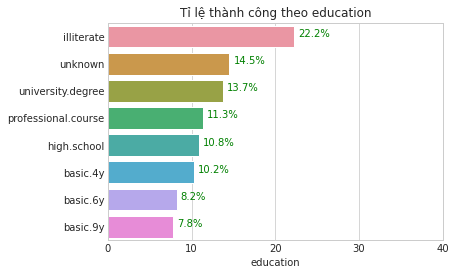

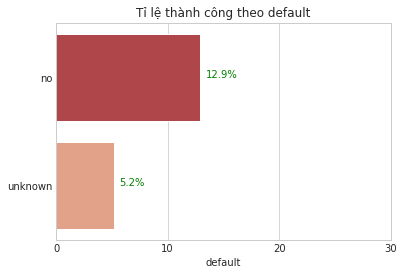

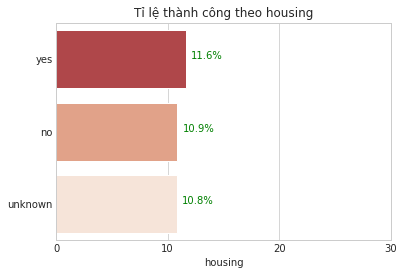

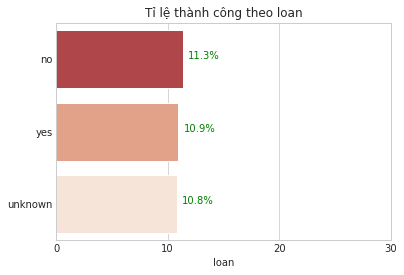

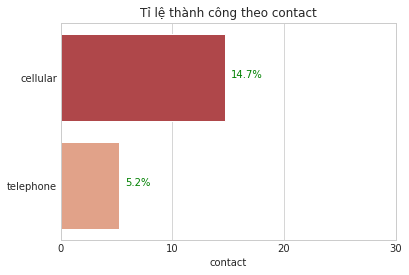

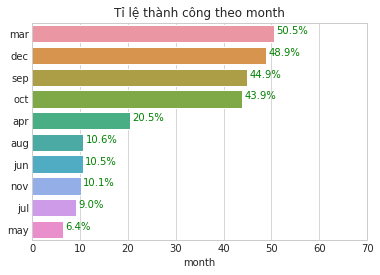

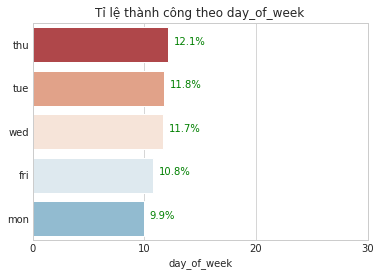

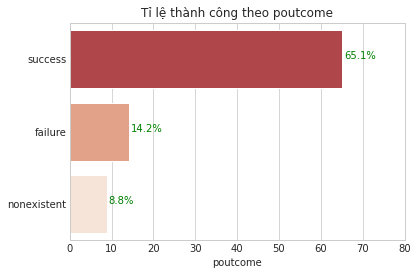

In [119]:
object_feature_list = list(df.dtypes[df.dtypes == 'object'].index)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6), facecolor='white')
for feature in object_feature_list[:-1]:
    feature_perct =  feature_perc(feature)
    plt.title('Tỉ lệ thành công theo {}'.format(feature)) 
    plot_barh(feature_perct.sort_values(ascending= False),10,20, text_color = 'green')
    plt.show()

# 6/ Findings:

1. Potential Customer Persona: nằm trong nhóm tuổi trung bình từ 25-50, chủ yếu là học sinh - sinh viên, người đã nghỉ hưu, lao động thất nghiệp, admin và quản lý. Những người đang độc thân có xu hướng gửi tiền cao hơn, không có nợ xấu nhưng vẫn có thể đang trả góp mua nhà hoặc số ít đang có những khoản vay nhỏ. Phương thức tiếp cận chủ yếu với nhóm khách này là điện thoại di động.
2. Là khách hàng mới, chưa từng liên lạc hoặc mới liên lạc 1-2 lần thì tỉ lệ thành công sẽ cao hơn. 
3. Tỉ lệ liên lạc gửi tiền thành công cao nhất là vào tháng 3 (có thể là sau kỳ nghỉ Tết), tiếp đó là tháng 12, tháng 9, tháng 10 và tháng 4.
4. Không có sự khác biệt khi liên hệ giữa các ngày trong tuần nhưng tỉ lệ thành công của ngày T5 có vẻ nhỉnh hơn, sau đó là T4 và T3, có thể do giữa tuần, khách không quá bận để xử lý công việc nên có thời gian lắng nghe tư vấn -> gửi tiền. 
5. Key metric: **Age, Job Title, Education, Marital, Default, Loan, Housing, Campaign, Month, Contact**. Chỉ số previous không ảnh hưởng nhiều đến kết quả của biến y, các chỉ số về xã hội có thể căn cứ nhưng khó thu thập nên có thể đưa vào phương án optional.

# **7/ Data Modeling:**

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score